In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re

In [3]:
df = pd.read_csv("Books.csv")

In [4]:
df.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22],"Fantasy, Children's fiction"
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction"
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100 million[26][27],Family saga


In [5]:
df.shape

(264, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Book               264 non-null    object
 1   Author(s)          264 non-null    object
 2   Original language  264 non-null    object
 3   First published    264 non-null    object
 4   Approximate sales  264 non-null    object
 5   Genre              264 non-null    object
dtypes: object(6)
memory usage: 12.5+ KB


In [7]:
#checking for missing values
df.isnull().sum()

Book                 0
Author(s)            0
Original language    0
First published      0
Approximate sales    0
Genre                0
dtype: int64

In [8]:
# cleaning the column for approximate sales

# function to extract numeric values and remove square brackets and contents
def extract_numeric(value):
    # Use regular expression to extract numeric values
    match = re.search(r'\d+', value)
    if match:
        result = int(match.group())
    else:
        result = None

    # Remove square brackets and their contents
    result = re.sub(r'\[.*\]', '', str(result))

    return result

# Apply the function to the 'approximate sales' column
df['Approximate sales'] = df['Approximate sales'].apply(extract_numeric)

In [9]:
# renaming the column 'approximate sales' to 'approximate sales in million'

df = df.rename(columns={'Approximate sales': 'Approximate sales in Millions'})


In [10]:
df.head()

,Book,Author(s),Original language,First published,Approximate sales in Millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200,"Fantasy, Children's fiction"
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120,"Fantasy, Children's fiction"
3,And Then There Were None,Agatha Christie,English,1939,100,Mystery
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100,Family saga


In [11]:
df['Original language'].unique()

array(['English', 'French', 'Chinese', 'Hindi', 'Portuguese', 'Spanish',
       'German', 'Italian', 'Norwegian', 'Russian', 'Dutch', 'Swedish',
       'Japanese', 'Czech', 'Yiddish', 'Gujarati'], dtype=object)

In [12]:
# Count the occurrences of each language
language_counts = df['Original language'].value_counts()

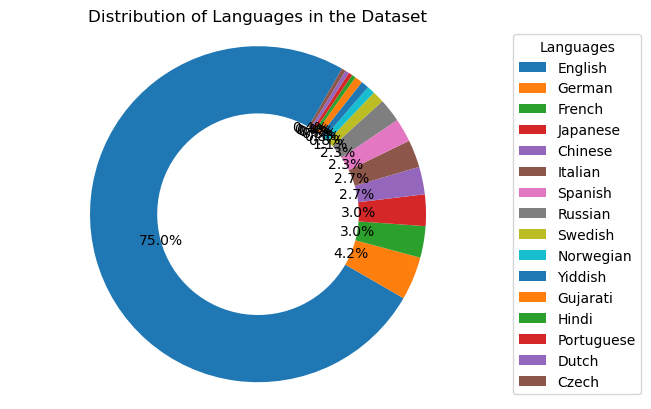

In [13]:
# Plotting the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(language_counts,
                                  textprops=dict(color="k"), autopct='%1.1f%%',wedgeprops=dict(width=0.4), startangle=60)

# Add a legend with color-coded language names
ax.legend(wedges, language_counts.index, title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the chart
plt.title('Distribution of Languages in the Dataset')
plt.savefig('Distribution of Languages in the Dataset')
plt.show()

In [14]:
df['Approximate sales in Millions'].dtype

dtype('O')

In [15]:
# Convert the 'Approximate sales' column to numeric float
df['Approximate sales in Millions'] = pd.to_numeric(df['Approximate sales in Millions'], errors='coerce')

# Display the updated data type
print("\nUpdated data type:")
print(df['Approximate sales in Millions'].dtype)



Updated data type:
int64


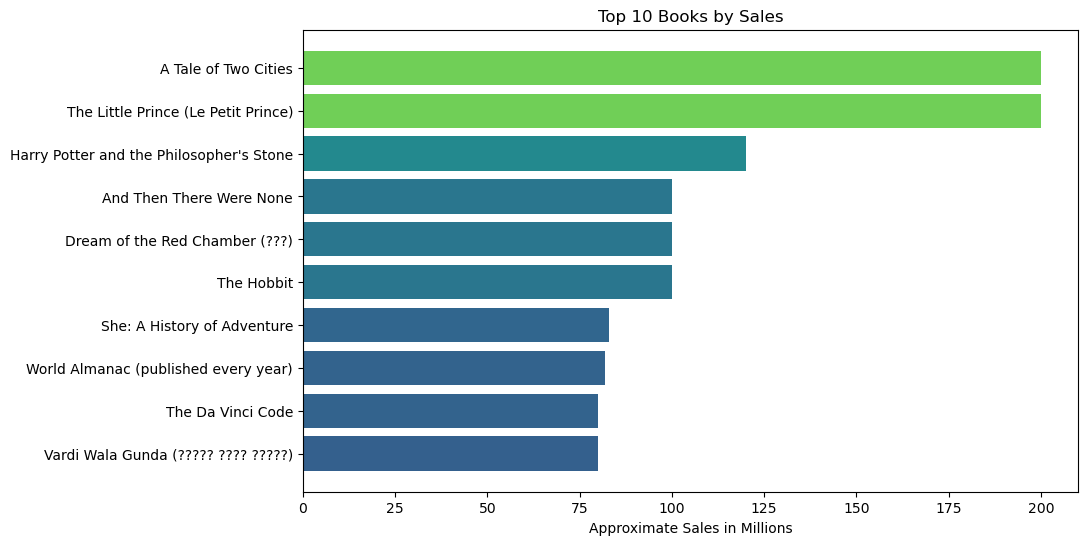

In [17]:
# Sort the DataFrame by sales in descending order and select the top 10
top_10_books = df.sort_values(by='Approximate sales in Millions', ascending=False).head(10)

# Plotting the top 10 books by sales
plt.figure(figsize=(10, 6))
plt.barh(top_10_books['Book'], top_10_books['Approximate sales in Millions'],  color=plt.cm.viridis(df['Approximate sales in Millions']))
plt.xlabel('Approximate Sales in Millions')
plt.title('Top 10 Books by Sales')
plt.gca().invert_yaxis()  # To display the highest sales at the top
plt.savefig("Top 10 Books by Sales")
plt.show()

In [18]:
# Extracting the numeric portion from the 'First published' column
df['First published'] = df['First published'].str.extract(r'(\d+)')

df['First published'].dtype

dtype('O')

In [19]:
# Convert the 'Approximate sales' column to numeric float
df['First published'] = pd.to_numeric(df['First published'], errors='coerce')

df['First published'].dtype

dtype('int64')

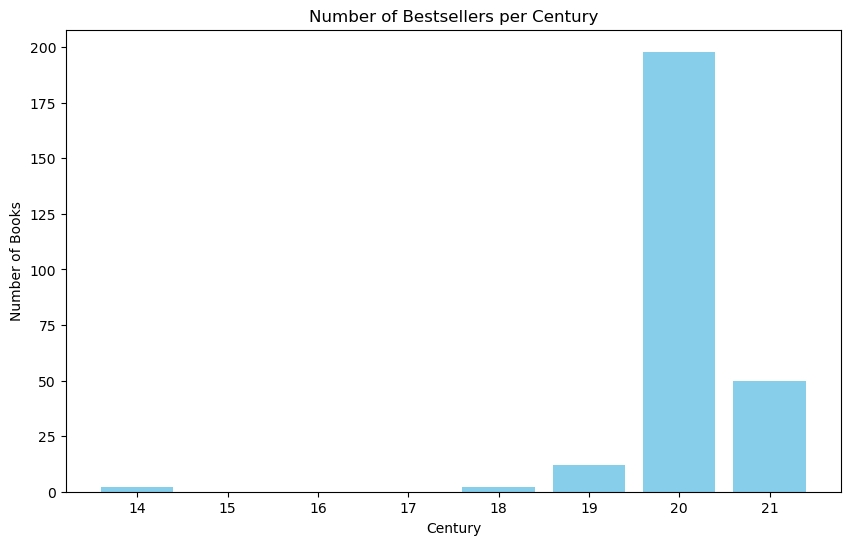

In [20]:
# Calculate the century for each book
df['Century'] = ((df['First published'] - 1) // 100) + 1

# Group by century and count the number of books
books_per_century = df.groupby('Century')['Book'].count().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(books_per_century['Century'], books_per_century['Book'], color='skyblue')
plt.xlabel('Century')
plt.ylabel('Number of Books')
plt.title('Number of Bestsellers per Century')
plt.savefig("Number of Bestsellers per Century")
plt.show()

In [21]:
df['Genre'].unique()

array(['Historical fiction', "Fantasy, Children's fiction", 'Mystery',
       'Family saga', 'Adventure', 'Detective', 'Mystery thriller',
       'Fantasy', 'Coming-of-age', 'Romance', 'Magic realism', 'Novel',
       "Children's fiction", 'Manual', "Children's novel",
       "Children's literature", 'Historical novel, mystery',
       'War, thriller', 'Sexology', 'Coming-of-age Murder mystery',
       "Children's Literature", 'Young Adult Fiction',
       'Historical fiction, war novel', 'Erotica', 'Science fiction',
       'Novella, Self-help', "Children's Literature, picture book",
       'Essay/Literature', 'Southern Gothic, Bildungsroman',
       'Gothic horror, Family saga',
       'Popular science, Anthropology, Astrophysics, Cosmology, Philosophy, History',
       'Philosophical novel, Young adult', 'Mystery-thriller',
       'Socialist realist novel', 'Historical novel',
       'Historical non-fiction, Autobiography, Memoir, Bildungsroman / Coming of Age, Jewish literature',
 

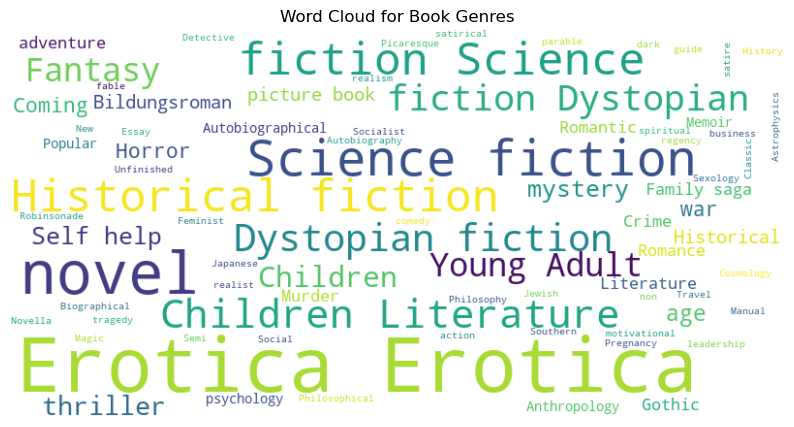

In [23]:
# Combine all genres into a single string
genres_text = ' '.join(df['Genre'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Book Genres')
plt.savefig("Word Cloud for Book Genres")
plt.show()

In [24]:
# Count the number of bestsellers per author
author_counts = df['Author(s)'].value_counts()

# Check if an author has more than one bestseller
authors_with_multiple_bestsellers = author_counts[author_counts > 1].index.tolist()

# Display authors with more than one bestseller
print("Authors with more than one bestseller:")
print(authors_with_multiple_bestsellers)

Authors with more than one bestseller:
['J. K. Rowling', 'Roald Dahl', 'Michael Ende', 'E. L. James', 'Erskine Caldwell', 'Ken Follett', 'Albert Camus', 'Patrick Süskind', 'Margaret Wise Brown', 'Anthony Doerr', 'S. E. Hinton', 'Sam McBratney', 'James Clavell', 'Janette Sebring Lowrey', 'Susanna Tamaro', 'John Steinbeck', 'Nicholas Evans', 'Michelle Obama', 'Douglas Adams', 'Mitch Albom', "Madeleine L'Engle", 'Nelson Mandela', 'Ernest Hemingway', 'Raymond Moody', 'Suzanne Collins', 'Jhumpa Lahiri', 'Carlos Ruiz Zafón', 'Markus Zusak', 'Dan Brown', 'Delia Owens', 'William Peter Blatty', 'Joseph Heller', 'Kathryn Stockett', 'Andrew Morton', 'Dr. Seuss', 'Astrid Lindgren', 'Julia Donaldson', 'John Boyne', 'Tomás Eloy Martínez', 'Kahlil Gibran', 'Dante Alighieri', 'Viktor Frankl', 'Osamu Dazai', 'Haruki Murakami', 'Jojo Moyes', 'Lois Lowry', 'Grace Metalious', 'Jung Chang', 'Alice Sebold', 'Richard Nelson Bolles', 'Mark Manson', 'Elie Wiesel', 'Yu Dan', 'Marabel Morgan', 'Taichi Sakaiya', 

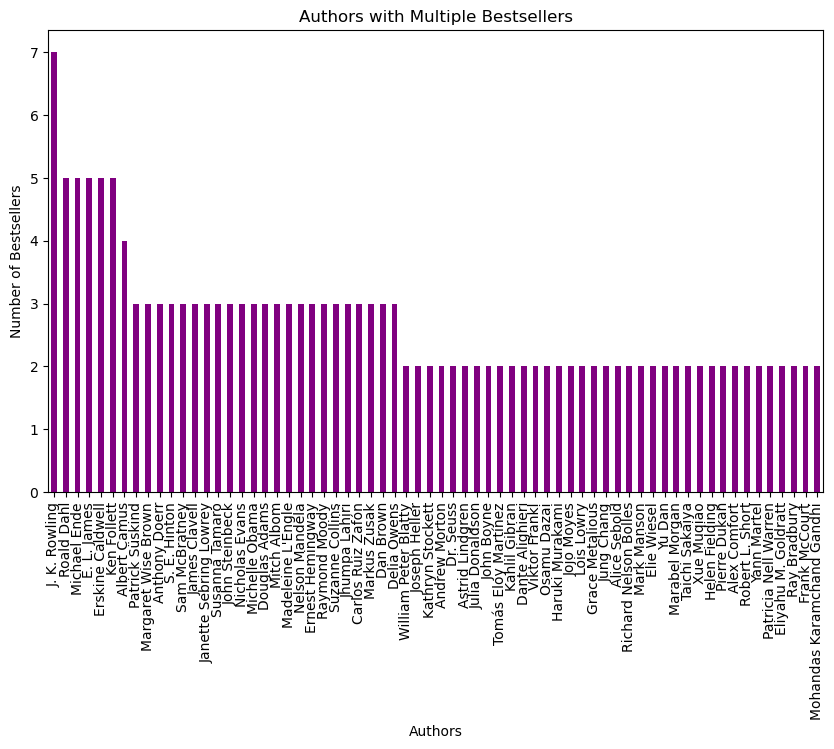

In [27]:

# Filter authors with more than one bestseller
authors_with_multiple_bestsellers = author_counts[author_counts > 1]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
authors_with_multiple_bestsellers.plot(kind='bar',  color= 'purple')
plt.xlabel('Authors')
plt.ylabel('Number of Bestsellers')
plt.title('Authors with Multiple Bestsellers')
plt.savefig("Authors with Multiple Bestsellers")
plt.show()

C:\Users\Mariam\AppData\Local\Temp\ipykernel_27636\3424798687.py:14: UserWarning: Glyph 138 (\x8a) missing from current font.
  plt.savefig("Top Sold Non-English Books")
C:\Users\Mariam\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


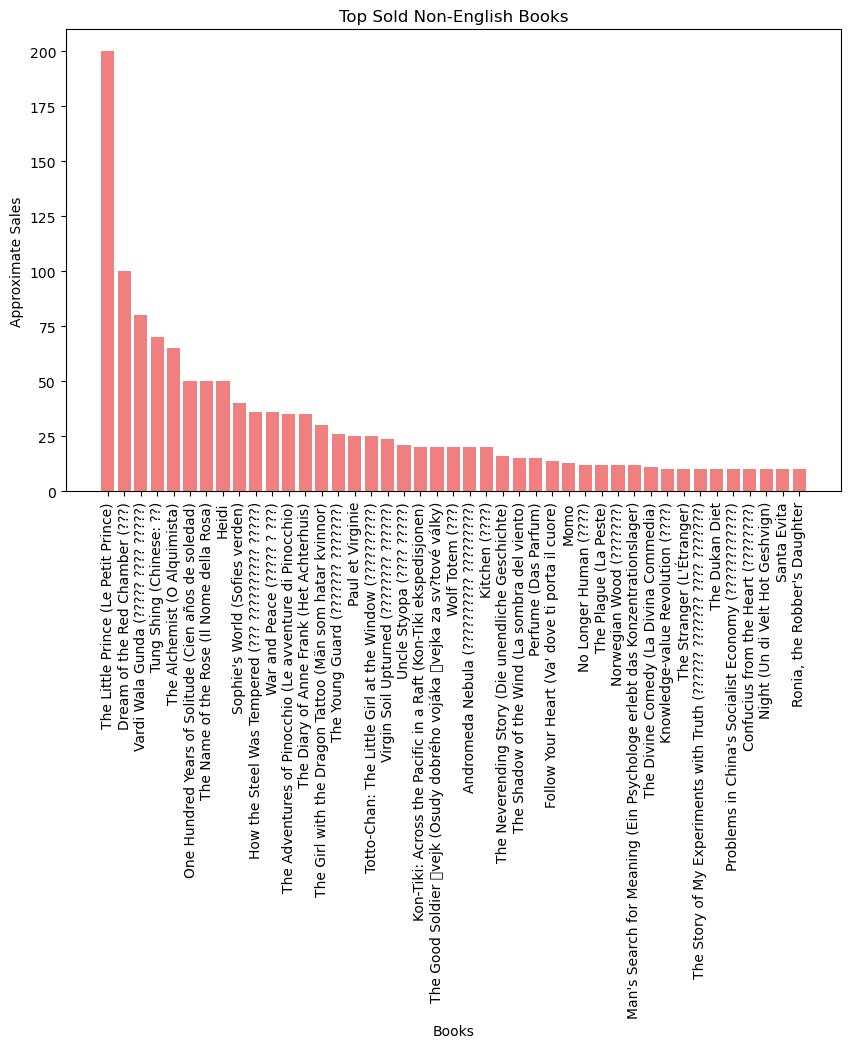

In [29]:
# Filter the DataFrame for books where the language is not English
non_english_books = df[df['Original language'] != 'English']

# Sort the non-English books by sales in descending order
top_non_english_books = non_english_books.sort_values(by='Approximate sales in Millions', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_non_english_books['Book'], top_non_english_books['Approximate sales in Millions'], color='lightcoral')
plt.xlabel('Books')
plt.xticks(rotation = 90)
plt.ylabel('Approximate Sales')
plt.title('Top Sold Non-English Books')
plt.savefig("Top Sold Non-English Books")
plt.show()

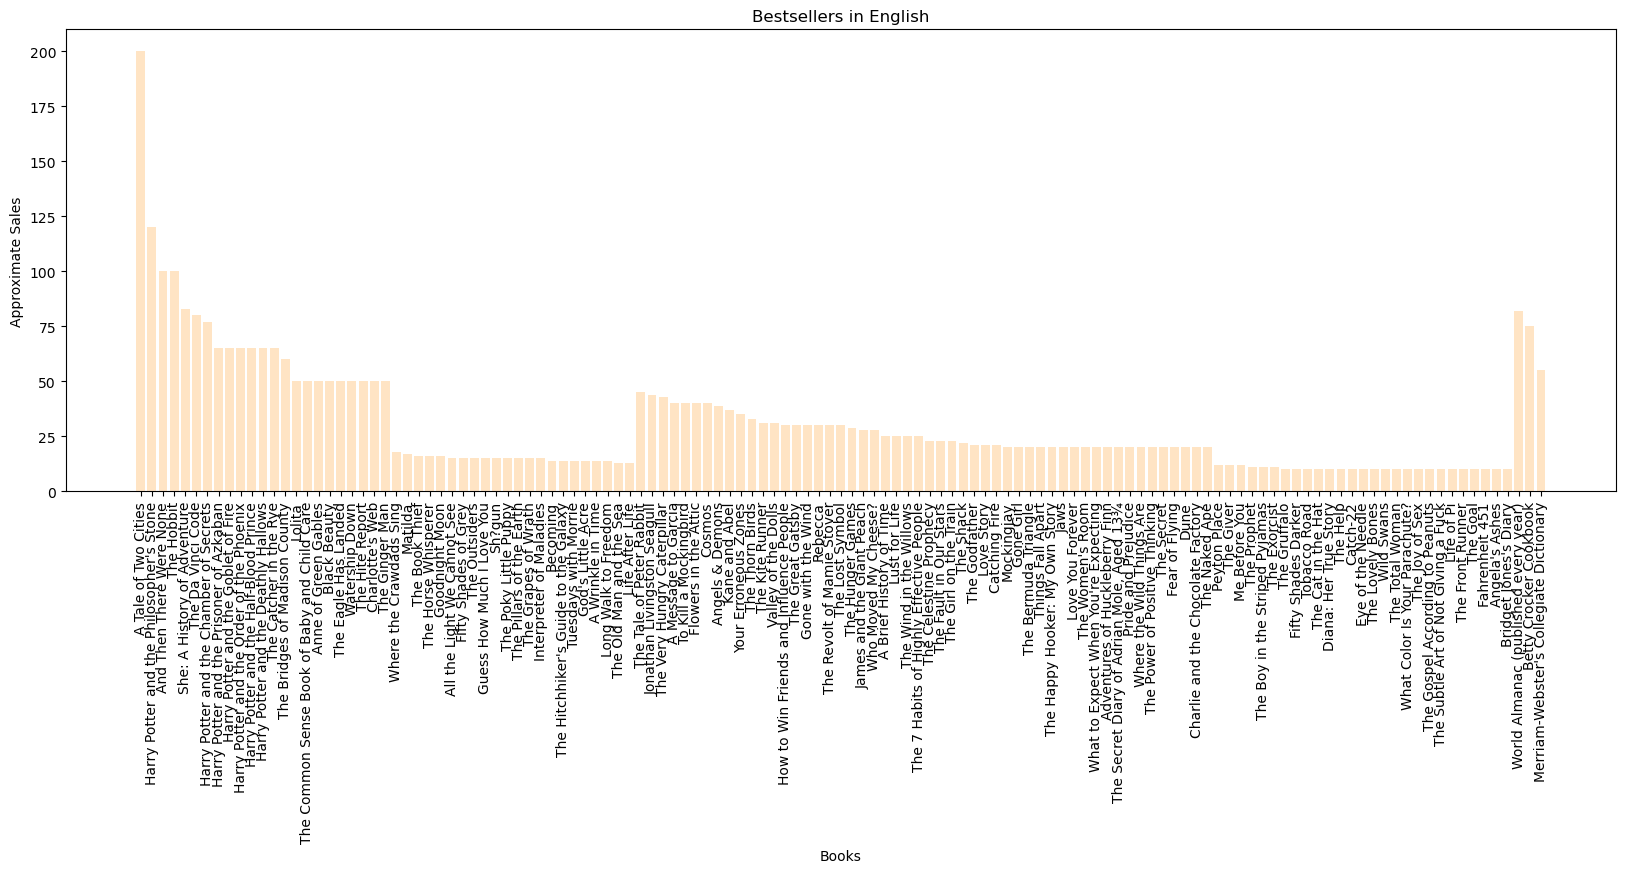

In [34]:
# Filter the DataFrame for books where the language is English
english_books = df[df['Original language'] == 'English']

# Plotting the bar chart
plt.figure(figsize=(20, 6))
plt.bar(english_books['Book'], english_books['Approximate sales in Millions'], color='bisque')
plt.xlabel('Books')
plt.xticks(rotation = 90)
plt.ylabel('Approximate Sales')
plt.title('Bestsellers in English')
plt.savefig("Bestsellers in English")
plt.show()

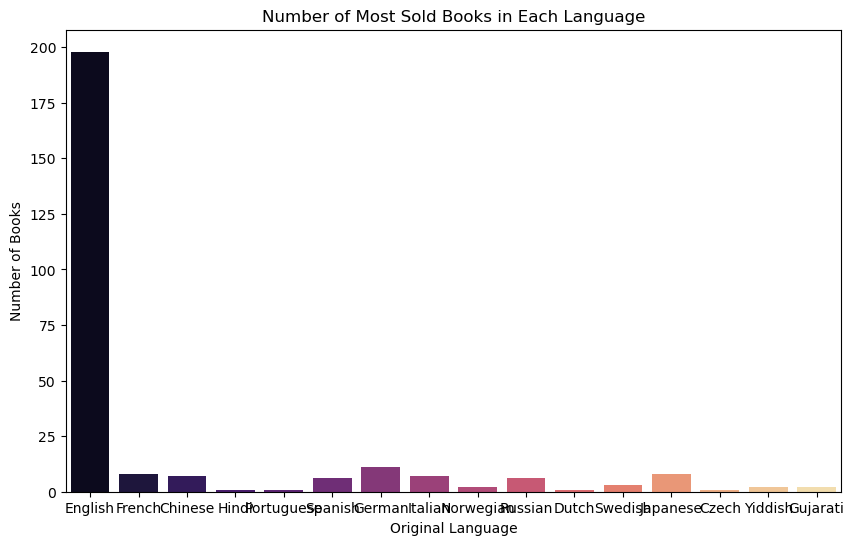

In [36]:
# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Original language', palette='magma')
plt.xlabel('Original Language')
plt.ylabel('Number of Books')
plt.title('Number of Most Sold Books in Each Language')
plt.savefig("Number of Most Sold Books in Each Language")
plt.show()